Module 1 Project

Part 1: Cleaning the Data

In [74]:
#import all libararies needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.stats.api as sms

In [2]:
#import data file
df = pd.read_csv('kc_house_data.csv')

In [3]:
df.head() #quick view of data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info() #get information

#21 columns
#21597 rows (entries)
#nulls in waterfront, view, yr_renovated

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [5]:
df.describe() #show standard measures for all integer variables

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.sqft_basement.value_counts() #checking out because listed as object.  Shows 454 values as '?'

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
2250.0        1
1960.0        1
225.0         1
1913.0        1
2350.0        1
906.0         1
295.0         1
1930.0        1
1798.0        1
704.0         1
2850.0        1
274.0         1
506.0         1
1024.0        1
1525.0        1
652.0         1
20.0          1
2196.0        1
283.0         1
2580.0        1
602.0         1
266.0         1
3260.0        1
946.0         1
508.0         1
4820.0        1
1852.0        1
768.0         1
784.0         1
276.0         1
Name: sqft_basement, Len

In [7]:
df.date.value_counts() #looks ok...all look like dates

6/23/2014     142
6/26/2014     131
6/25/2014     131
7/8/2014      127
4/27/2015     126
3/25/2015     123
4/28/2015     121
7/9/2014      121
4/22/2015     121
4/14/2015     121
4/21/2015     119
6/24/2014     119
10/28/2014    117
8/26/2014     117
7/14/2014     116
5/20/2014     116
7/1/2014      115
8/20/2014     114
6/17/2014     113
4/29/2015     113
4/8/2015      112
7/29/2014     112
5/28/2014     111
7/16/2014     111
4/23/2015     110
3/27/2015     109
8/5/2014      109
8/25/2014     109
6/20/2014     107
8/11/2014     107
             ... 
10/5/2014       3
5/9/2015        3
7/13/2014       3
5/11/2014       2
8/24/2014       2
11/28/2014      2
12/7/2014       2
8/9/2014        2
2/1/2015        2
12/27/2014      2
9/7/2014        2
12/21/2014      2
10/11/2014      2
5/10/2015       2
11/15/2014      2
7/4/2014        2
1/17/2015       1
11/30/2014      1
7/27/2014       1
5/24/2015       1
1/10/2015       1
3/8/2015        1
5/15/2015       1
8/3/2014        1
5/17/2014 

Based on initial analysis, need to take the following steps:

1) Take care of null values for: waterfront, view, yr_renovated

2) Take care of '?' values in sqft_basement

In [8]:
df.isna().sum() #checking for null values to ensure didn't miss any

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

0.0    19075
1.0      146
Name: waterfront, dtype: int64

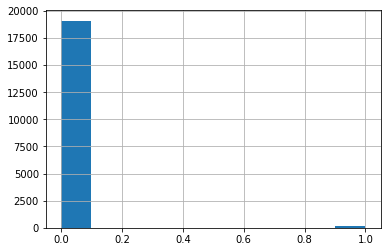

In [9]:
#take care of waterfront nulls
df.waterfront.hist() #histogram of non-null values

df.waterfront.value_counts()

In [10]:
#appears majority is at 0
#get percent that is 0
total_waterfront_values = len(df.waterfront)
zero_waterfront_values = df.waterfront.value_counts()[0]

zero_waterfront_percent = zero_waterfront_values / total_waterfront_values * 100
print('Percent 0 is: ', round(zero_waterfront_percent, 2),'%')

Percent 0 is:  88.32 %


In [11]:
#null value percent of total
null_waterfront_values = df.waterfront.isna().sum()

null_waterfront_percent = null_waterfront_values / total_waterfront_values * 100
print('Null is: ', round(null_waterfront_percent, 2),'%')

Null is:  11.0 %


In [12]:
#choosing to remove waterfront as a column because 88.32% of values are 0 and 11.0% values are null
#and therefore waterfront will not be a helpful predictor of house price
df_new = df.copy()
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [13]:
del df_new['waterfront']
df_new.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

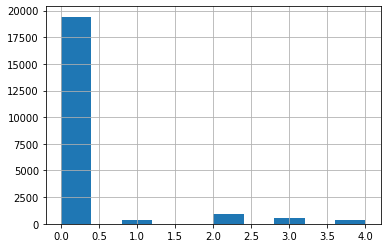

In [14]:
#take care of view nulls from df_new
df_new.view.hist() #histogram of non-null values

df_new.view.value_counts()

In [15]:
#null value percent of total
total_view_values = len(df_new.view)
null_view_values = df_new.view.isna().sum()
null_view_percent = null_view_values / total_view_values * 100
print('Null is: ', round(null_view_percent, 2),'%')

Null is:  0.29 %


In [16]:
#Since less than 1% null, going to replace with mode value
#View appears to be a category variable although presents as integer
#Only 3 possible values: 0, 1, 2, 3, 4

view_mode = df_new.view.mode()
df_new['view'].fillna(view_mode[0], inplace = True)
print(df_new.isna().sum())

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

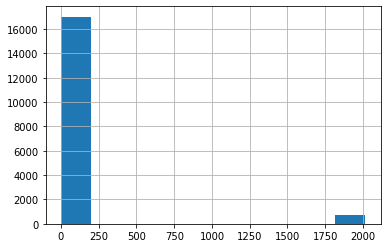

In [17]:
#take care of yr_renovated nulls from df_new
df_new.yr_renovated.hist() #histogram of non-null values

df_new.yr_renovated.value_counts()

In [18]:
#null value percent of total
total_yr_renovated_values = len(df_new.yr_renovated)
null_yr_renovated_values = df_new.yr_renovated.isna().sum()
null_yr_renovated_percent = null_yr_renovated_values / total_yr_renovated_values * 100
print('Null is: ', round(null_yr_renovated_percent, 2),'%')

Null is:  17.79 %


In [19]:
#appears majority is at 0
#get percent that is 0
zero_yr_renovated_values = df.yr_renovated.value_counts()[0]

zero_yr_renovated_percent = zero_yr_renovated_values / total_yr_renovated_values * 100
print('Percent 0 is: ', round(zero_yr_renovated_percent, 2),'%')

Percent 0 is:  78.77 %


In [20]:
#0 must mean that these houses were not renovated.  Can assume null values also mean house was not renovated.
#change null values to 0.0
#Note that for yr_renovated 0.0 means that house was not renovated

df_new['yr_renovated'].fillna(0.0, inplace = True)
print(df_new.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [21]:
#take care of sqft_basement '?'
df.sqft_basement.value_counts() #checking out because listed as object.  Shows 454 values as '?'

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
800.0       201
400.0       184
1000.0      148
900.0       142
300.0       142
200.0       105
750.0       104
450.0       103
530.0       103
480.0       103
720.0        98
620.0        90
580.0        84
840.0        83
420.0        81
860.0        79
670.0        78
1100.0       78
780.0        76
550.0        76
650.0        75
240.0        74
680.0        73
380.0        73
850.0        72
          ...  
2250.0        1
1960.0        1
225.0         1
1913.0        1
2350.0        1
906.0         1
295.0         1
1930.0        1
1798.0        1
704.0         1
2850.0        1
274.0         1
506.0         1
1024.0        1
1525.0        1
652.0         1
20.0          1
2196.0        1
283.0         1
2580.0        1
602.0         1
266.0         1
3260.0        1
946.0         1
508.0         1
4820.0        1
1852.0        1
768.0         1
784.0         1
276.0         1
Name: sqft_basement, Len

In [22]:
#check for % that has '?'
total_sqft_basement_values = len(df_new.sqft_basement)
null_sqft_basement_values = df_new.sqft_basement.value_counts()[1]

null_sqft_basement_percent = null_sqft_basement_values / total_sqft_basement_values * 100
print('Null is: ', round(null_sqft_basement_percent, 2),'%')

Null is:  2.1 %


In [23]:
#since only 2.1%, assume that ? means no basement and replace with 0
df_new['sqft_basement'].replace('?', "0.0", inplace = True)
#convert values to float
df_new.sqft_basement = pd.to_numeric(df_new.sqft_basement)

Part 2: Data Exploration (EDA)

Your project contains at least 4 meaningful data visualizations, with corresponding interpretations.
All visualizations are well labeled with axes labels, a title, and a legend (when appropriate)

You pose at least 3 meaningful questions and answer them through EDA. These questions should be well labeled and easy to identify inside the notebook.

Level Up: Each question is clearly answered with a visualization that makes the answer easy to understand.

Your notebook should contain 1 - 2 paragraphs briefly explaining your approach to this project.

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(1)
memory usage: 3.3+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c213d1d30>,
      dtype=object)

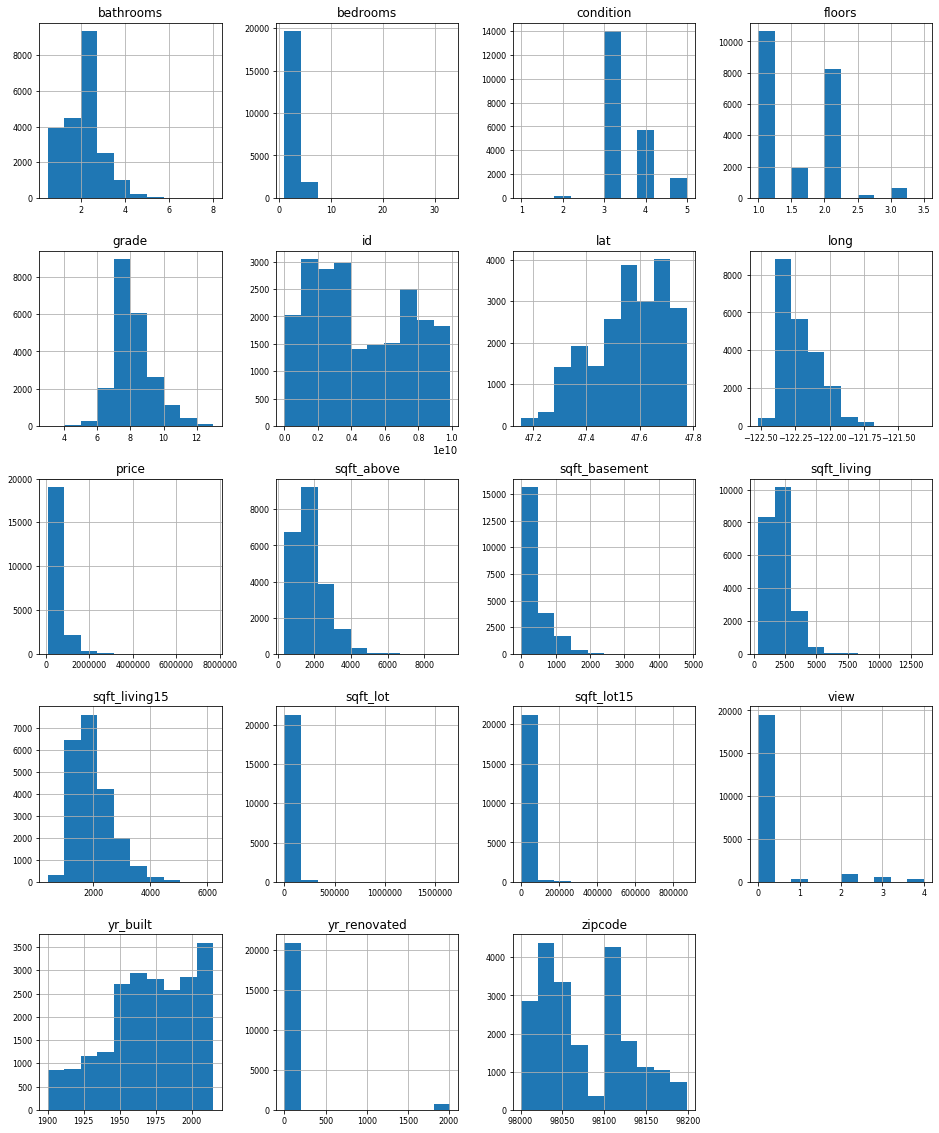

In [25]:
df_new.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

In [26]:
#Explore the data with 3 questions

In [27]:
# Question 1:
# Type of Plot: 

In [28]:
# Question 2:
# Type of Plot: 

In [29]:
# Question 3:
# Type of Plot: 

In [30]:
#Extra graph because need 4

Part 3: Modeling (Multi-linear)

Your model should not include any predictors with p-values greater than .05.

Your notebook shows an iterative approach to modeling, and details the parameters and results of the model at each iteration.

Level Up: Whenever necessary, you briefly explain the changes made from one iteration to the next, and why you made these choices.

You provide at least 1 paragraph explaining your final model.

You pick at least 3 coefficients from your final model and explain their impact on the price of a house in this dataset.

In [31]:
f_date = 'price ~ date'
model_date = model = ols(formula = f_date, data= df_new).fit()
model_date.summary()

#not sure what to do here

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.156
Date:                Mon, 26 Aug 2019   Prob (F-statistic):             0.0210
Time:                        14:35:19   Log-Likelihood:            -3.0717e+05
No. Observations:               21597   AIC:                         6.151e+05
Df Residuals:                   21225   BIC:                         6.181e+05
Df Model:                         371                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            3.25e+05   3.67e+05      0.886      0.376   -3.94e+05    1.04e+06
date[T.1/12/2015]   2.856e+05   3.71e+05      0.769      0.442   -4.42e+05    1.01e+06
date[T.1/13/2015]    1.94e+05   3.71e+05      0.523      0.601   -5.33e+05    9.21e+05
date[T.1/14/2015]   1.734e+05    3.7e+05      0.468      0.640   -5.53e+05       9e+05
date[T.1/15/2015]    1.59e+05   3.71e+05      0.429      0.668   -5.68e+05    8.86e+05
date[T.1/16/2015]   2.111e+05    3.7e+05      0.570      0.569   -5.15e+05    9.37e+05
date[T.1/17/2015]      -9e+04   5.19e+05     -0.173      0.862   -1.11e+06    9.27e+05
date[T.1/19/2015]   1.347e+05   3.89e+05      0.346      0.729   -6.28e+05    8.97e+05
date[T.1/2/2015]    1.906e+05   3.71e+05      0.514      0.607   -5.36e+05    9.18e+05
date[T.1/20/2015]   1.444e+05   3.71e+05      0.389      0.697   -5.82e+05    8.71e+05
date[T.1/21/2015]   1.633e+05    3.7e+05      0.441      0.659   -5.62e+05    8.89e+05
date[T.1/22/2015]   2.287e+05   3.71e+05      0.617      0.537   -4.98e+05    9.55e+05
date[T.1/23/2015]   1.735e+05   3.71e+05      0.468      0.640   -5.53e+05       9e+05
date[T.1/24/2015]   3.488e+05    4.1e+05      0.850      0.395   -4.55e+05    1.15e+06
date[T.1/25/2015]    1.54e+05   4.24e+05      0.364      0.716   -6.76e+05    9.84e+05
date[T.1/26/2015]   1.918e+05   3.71e+05      0.517      0.605   -5.35e+05    9.18e+05
date[T.1/27/2015]   2.126e+05    3.7e+05      0.574      0.566   -5.13e+05    9.38e+05
date[T.1/28/2015]   1.664e+05    3.7e+05      0.450      0.653   -5.59e+05    8.91e+05
date[T.1/29/2015]   1.011e+05   3.71e+05      0.272      0.785   -6.26e+05    8.28e+05
date[T.1/30/2015]   3.743e+05   3.72e+05      1.006      0.314   -3.55e+05     1.1e+06
date[T.1/31/2015]    3.65e+05   5.19e+05      0.703      0.482   -6.52e+05    1.38e+06
date[T.1/5/2015]    2.339e+05    3.7e+05      0.632      0.527   -4.91e+05    9.59e+05
date[T.1/6/2015]    9.458e+04   3.71e+05      0.255      0.799   -6.33e+05    8.22e+05
date[T.1/7/2015]    2.745e+05    3.7e+05      0.741      0.458   -4.51e+05       1e+06
date[T.1/8/2015]    2.165e+05   3.71e+05      0.584      0.559    -5.1e+05    9.43e+05
date[T.1/9/2015]     2.83e+05   3.72e+05      0.761      0.447   -4.46e+05    1.01e+06
date[T.10/1/2014]    2.82e+05   3.69e+05      0.764      0.445   -4.41e+05    1.01e+06
date[T.10/10/2014]   2.21e+05   3.69e+05      0.599      0.549   -5.02e+05    9.44e+05
date[T.10/11/2014]  1.695e+06   4.49e+05      3.772      0.000    8.14e+05    2.58e+06
date[T.10/12/2014]  1.761e+05   4.24e+05      0.416      0.678   -6.54e+05    1.01e+06
date[T.10/13/2014]  3.361e+05    3.7e+05      0.909      0.363   -3.89e+05    1.06e+06
date[T.10/14/2014]  2.563e+05   3.69e+05      0.695      0.487   -4.67e+05    9.79e+05
date[T.10/15/2014]  2.272e+05   3.69e+

In [32]:
#take out date
f = 'price ~ id + bedrooms + bathrooms + sqft_living + sqft_lot + floors + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15'
model = ols(formula = f, data= df_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2596.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        14:35:20   Log-Likelihood:            -2.9495e+05
No. Observations:               21597   AIC:                         5.899e+05
Df Residuals:                   21578   BIC:                         5.901e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.799e+06   3.01e+06      2.592      0.010     1.9e+06    1.37e+07
id            -1.436e-06   4.95e-07     -2.899      0.004   -2.41e-06   -4.65e-07
bedrooms      -3.863e+04   1948.991    -19.820      0.000   -4.24e+04   -3.48e+04
bathrooms      4.106e+04   3348.709     12.260      0.000    3.45e+04    4.76e+04
sqft_living      99.5267     18.553      5.365      0.000      63.162     135.891
sqft_lot          0.0923      0.049      1.875      0.061      -0.004       0.189
floors         7349.1326   3695.703      1.989      0.047     105.282    1.46e+04
view             7.9e+04   2038.351     38.755      0.000     7.5e+04     8.3e+04
condition      2.732e+04   2408.707     11.341      0.000    2.26e+04     3.2e+04
grade          9.564e+04   2217.618     43.128      0.000    9.13e+04       1e+05
sqft_above       87.1797     18.541      4.702      0.000      50.837     123.522
sqft_basement    52.6030     18.378      2.862      0.004      16.580      88.626
yr_built      -2621.7868     73.828    -35.512      0.000   -2766.496   -2477.078
yr_renovated     29.1212      4.079      7.140      0.000      21.126      37.116
zipcode        -599.5630     33.857    -17.709      0.000    -665.926    -533.200
lat            5.972e+05    1.1e+04     54.184      0.000    5.76e+05    6.19e+05
long          -2.217e+05   1.35e+04    -16.396      0.000   -2.48e+05   -1.95e+05
sqft_living15    17.5952      3.540      4.971      0.000      10.657      24.533
sqft_lot15       -0.3735      0.075     -4.949      0.000      -0.521      -0.226
==============================================================================
Omnibus:                    19251.628   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2066653.142
Skew:                           3.844   Prob(JB):                         0.00
Kurtosis:                      50.302   Cond. No.                     1.16e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
outcome = 'price'
predictors = df_new.drop(columns = ['price', 'date'], axis=1) #dropping price and date
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

In [89]:
# p > .05 for sqft_lot and floors...remove those from model
f_new = 'price ~ id + bedrooms + bathrooms + sqft_living + view + condition + grade + sqft_above + sqft_basement + yr_built + yr_renovated + zipcode + lat + long + sqft_living15 + sqft_lot15'
model_new = ols(formula = f_new, data= df_new).fit()
model_new.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     2919.
Date:                Mon, 26 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:51:07   Log-Likelihood:            -2.9495e+05
No. Observations:               21597   AIC:                         5.899e+05
Df Residuals:                   21580   BIC:                         5.901e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      7.031e+06   2.96e+06      2.375      0.018    1.23e+06    1.28e+07
id            -1.477e-06   4.95e-07     -2.985      0.003   -2.45e-06   -5.07e-07
bedrooms      -3.881e+04   1948.056    -19.923      0.000   -4.26e+04    -3.5e+04
bathrooms      4.284e+04   3229.400     13.265      0.000    3.65e+04    4.92e+04
sqft_living      96.7101     18.502      5.227      0.000      60.445     132.975
view           7.922e+04   2036.918     38.892      0.000    7.52e+04    8.32e+04
condition      2.696e+04   2404.441     11.211      0.000    2.22e+04    3.17e+04
grade          9.612e+04   2208.477     43.522      0.000    9.18e+04       1e+05
sqft_above       91.5680     18.435      4.967      0.000      55.434     127.702
sqft_basement    52.8876     18.380      2.877      0.004      16.861      88.914
yr_built      -2596.9051     72.043    -36.047      0.000   -2738.115   -2455.696
yr_renovated     29.3729      4.075      7.208      0.000      21.385      37.360
zipcode        -593.3067     33.715    -17.598      0.000    -659.390    -527.224
lat            5.982e+05    1.1e+04     54.492      0.000    5.77e+05     6.2e+05
long          -2.222e+05   1.34e+04    -16.535      0.000   -2.49e+05   -1.96e+05
sqft_living15    16.3986      3.511      4.671      0.000       9.517      23.280
sqft_lot15       -0.2842      0.055     -5.157      0.000      -0.392      -0.176
==============================================================================
Omnibus:                    19184.758   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2037813.638
Skew:                           3.825   Prob(JB):                         0.00
Kurtosis:                      49.968   Cond. No.                     1.14e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
predictors.corr()
#predictors with corr > 0.75: sqft_living/bathrooms, sqft_living/grade, sqft_living/sqft_above, sqft_living/sqft_living15
#sqft_lot/sqft_lot15, grade/sqft_above

#remove: bathrooms, grade, sqft_above, sqft_living15, sqft_lot15

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001150,0.005162,-0.012241,-0.131911,0.018608,0.011772,-0.023803,0.008188,-0.010799,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
bedrooms,0.001150,1.000000,0.514508,0.578212,0.032471,0.177944,0.078354,0.026496,0.356563,0.479386,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.514508,1.000000,0.755758,0.088373,0.502582,0.186016,-0.126479,0.665838,0.686668,0.278485,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.578212,0.755758,1.000000,0.173453,0.353953,0.281715,-0.059445,0.762779,0.876448,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.032471,0.088373,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.114731,0.184139,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.177944,0.502582,0.353953,-0.004814,1.000000,0.028414,-0.264075,0.458794,0.523989,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722
view,0.011772,0.078354,0.186016,0.281715,0.075054,0.028414,1.000000,0.045622,0.249082,0.166017,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702,0.278928,0.073083
condition,-0.023803,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.045622,1.000000,-0.146896,-0.158904,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.008188,0.356563,0.665838,0.762779,0.114731,0.458794,0.249082,-0.146896,1.000000,0.756073,0.165843,0.447865,0.015623,-0.185771,0.113575,0.200341,0.713867,0.120981
sqft_above,-0.010799,0.479386,0.686668,0.876448,0.184139,0.523989,0.166017,-0.158904,0.756073,1.000000,-0.051175,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077


In [43]:
#dropping: bathrooms, grade, sqft_above, sqft_living15, sqft_lot15
predictors_new = predictors.drop(columns = ['bathrooms', 'grade', 'sqft_above', 'sqft_living15', 'sqft_lot15'], axis = 1)
predictors_new.head()


,id,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,3,1180,5650,1.0,0.0,3,0.0,1955,0.0,98178,47.5112,-122.257
1,6414100192,3,2570,7242,2.0,0.0,3,400.0,1951,1991.0,98125,47.7210,-122.319
2,5631500400,2,770,10000,1.0,0.0,3,0.0,1933,0.0,98028,47.7379,-122.233
3,2487200875,4,1960,5000,1.0,0.0,5,910.0,1965,0.0,98136,47.5208,-122.393
4,1954400510,3,1680,8080,1.0,0.0,3,0.0,1987,0.0,98074,47.6168,-122.045


In [44]:
predictors_new.corr()

,id,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
id,1.000000,0.001150,-0.012241,-0.131911,0.018608,0.011772,-0.023803,-0.004359,0.021617,-0.010612,-0.008211,-0.001798,0.020672
bedrooms,0.001150,1.000000,0.578212,0.032471,0.177944,0.078354,0.026496,0.297229,0.155670,0.017900,-0.154092,-0.009951,0.132054
sqft_living,-0.012241,0.578212,1.000000,0.173453,0.353953,0.281715,-0.059445,0.428660,0.318152,0.051060,-0.199802,0.052155,0.241214
sqft_lot,-0.131911,0.032471,0.173453,1.000000,-0.004814,0.075054,-0.008830,0.015031,0.052946,0.004979,-0.129586,-0.085514,0.230227
floors,0.018608,0.177944,0.353953,-0.004814,1.000000,0.028414,-0.264075,-0.241866,0.489193,0.003793,-0.059541,0.049239,0.125943
view,0.011772,0.078354,0.281715,0.075054,0.028414,1.000000,0.045622,0.270629,-0.054452,0.090339,0.085059,0.006321,-0.077702
condition,-0.023803,0.026496,-0.059445,-0.008830,-0.264075,0.045622,1.000000,0.168482,-0.361592,-0.055808,0.002888,-0.015102,-0.105877
sqft_basement,-0.004359,0.297229,0.428660,0.015031,-0.241866,0.270629,0.168482,1.000000,-0.130085,0.065008,0.073271,0.109853,-0.142369
yr_built,0.021617,0.155670,0.318152,0.052946,0.489193,-0.054452,-0.361592,-0.130085,1.000000,-0.202555,-0.347210,-0.148370,0.409993
yr_renovated,-0.010612,0.017900,0.051060,0.004979,0.003793,0.090339,-0.055808,0.065008,-0.202555,1.000000,0.062397,0.027970,-0.064543


In [ ]:
#check other paramaters for factors: Linearity, Normality, Homoscedasticity

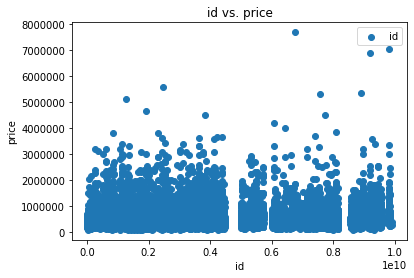

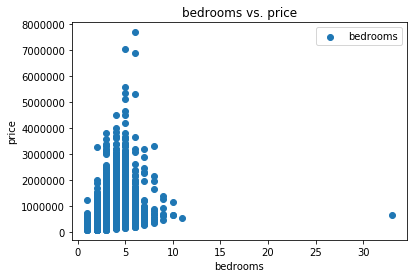

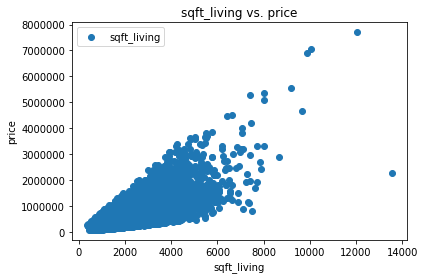

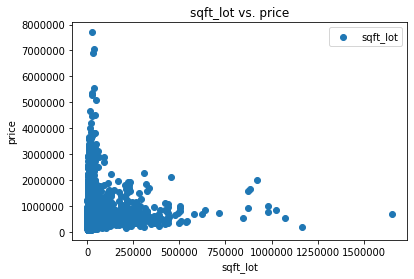

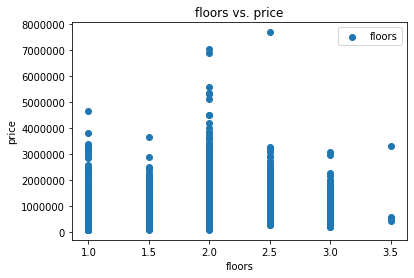

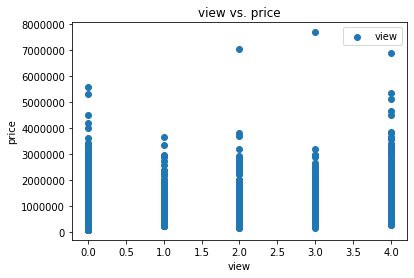

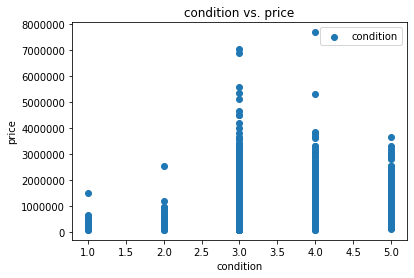

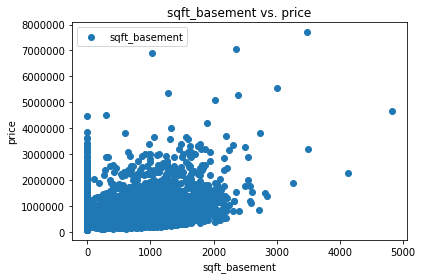

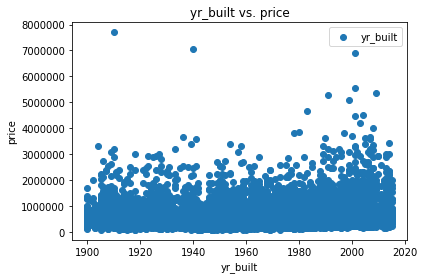

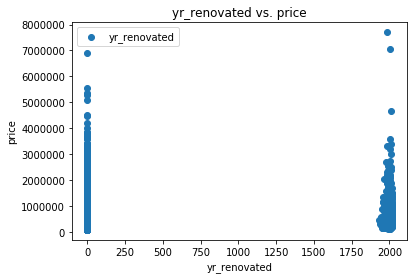

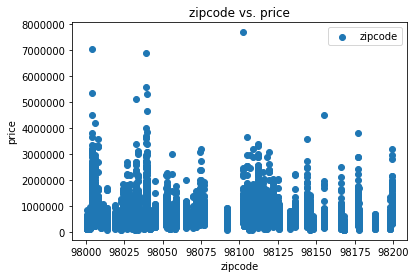

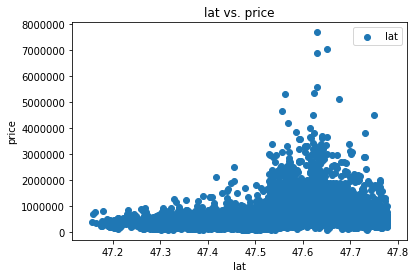

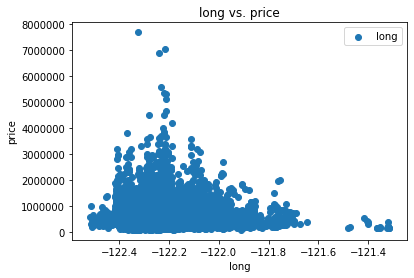

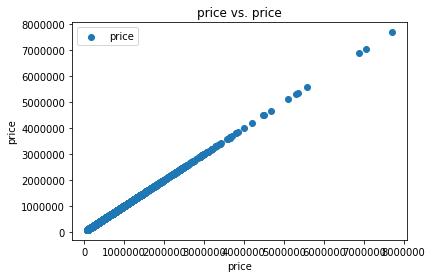

In [67]:
#linearity check (scatter plot)
price_and_predictors = predictors_new.copy()
price_and_predictors['price'] = df_new.price

for column in price_and_predictors:
    plt.scatter(price_and_predictors[column], price_and_predictors.price, label=column)
    plt.xlabel(column)
    plt.ylabel('price')
    plt.title(str(column) + ' vs. price')
    plt.legend()
    plt.show()

In [ ]:
#linearity check:
#id: No
#bedrooms: category
#sqft_living: Yes
#sqft_lot:Maybe...
#floors: category
#views: category
#condition: category
#sqft_basement: Yes
#yr_built: No
#yr_renovated: category
#zipcode: category
#lat: Maybe...
#long: No

#Remove: id, yr_built, long
#Categories: bedrooms, floors, view, condition, yr_renovated, zipcode
#Leave in: sqft_living, sqft_lot, sqft_basement, lat


In [124]:
#Remove: id, yr_built, long
price_and_predictors_new = price_and_predictors.drop(columns = ['id', 'yr_built', 'long'])


def encoding(data_frame, category):
    data_frame[category].astype('category').cat.codes

encoding(price_and_predictors_new, 'bedrooms')
encoding(price_and_predictors_new, 'floors')
encoding(price_and_predictors_new, 'view')
encoding(price_and_predictors_new, 'condition')
encoding(price_and_predictors_new, 'yr_renovated')
encoding(price_and_predictors_new, 'zipcode')
price_and_predictors_new.head()

,bedrooms,sqft_living,sqft_lot,floors,view,condition,sqft_basement,yr_renovated,zipcode,lat,price
0,3,1180,5650,1.0,0.0,3,0.0,0.0,98178,47.5112,221900.0
1,3,2570,7242,2.0,0.0,3,400.0,1991.0,98125,47.7210,538000.0
2,2,770,10000,1.0,0.0,3,0.0,0.0,98028,47.7379,180000.0
3,4,1960,5000,1.0,0.0,5,910.0,0.0,98136,47.5208,604000.0
4,3,1680,8080,1.0,0.0,3,0.0,0.0,98074,47.6168,510000.0


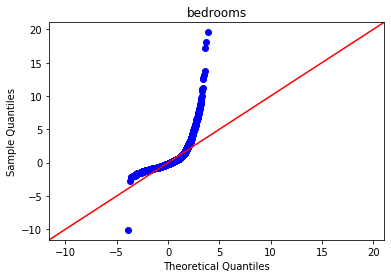

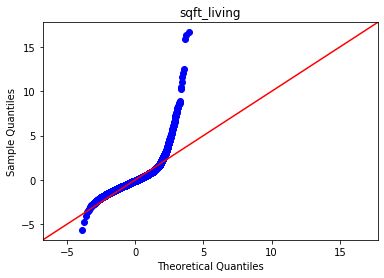

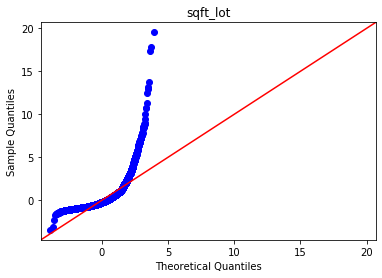

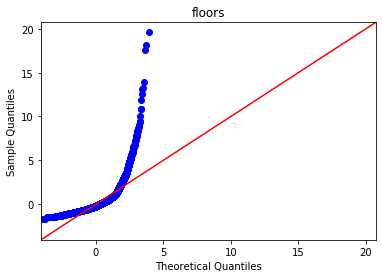

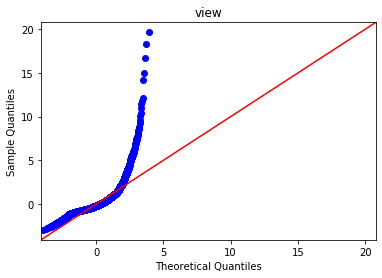

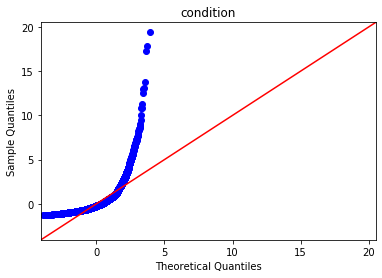

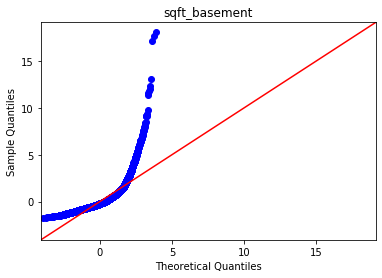

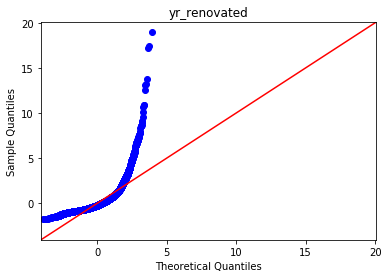

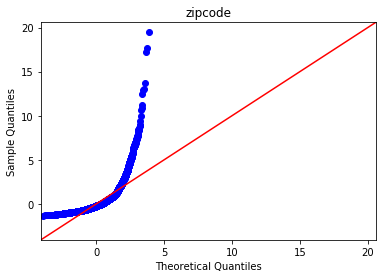

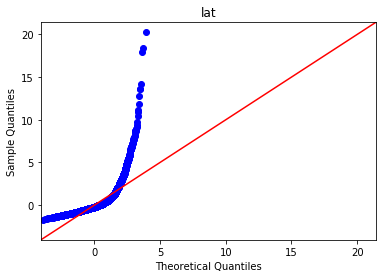

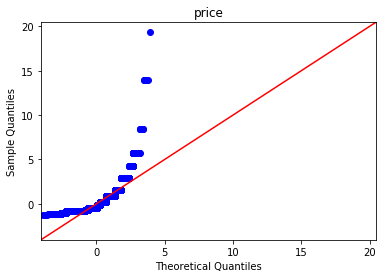

In [130]:
#normality check (q-q plot of residuals)
for column in price_and_predictors_new:
    f_linear = 'price ~ ' + column
    model_normal_check = ols(formula = f_linear, data= price_and_predictors_new).fit()
    fig = sm.graphics.qqplot(model_normal_check.resid, dist=stats.norm, line='45', fit=True,   )
    plt.title(column)
    plt.show()
    

In [ ]:
#homoscedasticity check (scatter plot of residuals)

,0,1,2,3,4,5
0,ind_var,r_squared,intercept,slope,p-value,normality (JB)
1,sqft_living,0.684075,7.79916e+06,-1.43644e-06,0.00374137,2.06665e+06
2,sqft_lot,0.684075,7.79916e+06,-1.43644e-06,0.00374137,2.06665e+06
3,sqft_basement,0.684075,7.79916e+06,-1.43644e-06,0.00374137,2.06665e+06
4,lat,0.684075,7.79916e+06,-1.43644e-06,0.00374137,2.06665e+06
5,price,0.684075,7.79916e+06,-1.43644e-06,0.00374137,2.06665e+06


Other stuff

In [36]:

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [37]:
result = stepwise_selection(predictors, df_new["price"], verbose = True)
print('resulting features:')
print(result)

//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  bedrooms                       with p-value 0.0
Add  sqft_living15                  with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  grade                          with p-value 0.0
Add  lat                            with p-value 0.0
Add  view                           with p-value 1.85633e-309
Add  bathrooms                      with p-value 4.29396e-50
Add  zipcode                        with p-value 2.2742e-36
Add  long                           with p-value 5.6145e-60
Add  condition                      with p-value 2.86806e-19
Add  sqft_above                     with p-value 4.19122e-23
Add  yr_renovated                   with p-value 5.70827e-13
Add  sqft_lot15                     with p-value 1.62719e-06
Add  id                             with p-value 0.00291686
Add  sqft_basement                  with p-value 0.00401289
resulting features:
['bedrooms', 'sqft_living15', 'sqft_living', 'yr_built'